# Loop 15 Analysis: Final Assessment

**Goal**: Assess whether further experimentation is warranted or if we've reached the ceiling.

**Key Questions**:
1. Is the target (0.0333) achievable with tabular approaches?
2. What unexplored directions remain?
3. Should we submit or continue experimenting?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP [128,128,64]'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LightGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'Combined features'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': '15-model ensemble'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'MLP [64,32]'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'MLP [32,16]'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'MLP [16]'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': '2-model ensemble'},
]

df = pd.DataFrame(submissions)
df['ratio'] = df['lb'] / df['cv']
print(df.to_string(index=False))

    exp     cv     lb             model     ratio
exp_000 0.0111 0.0982  MLP [128,128,64]  8.846847
exp_001 0.0123 0.1065          LightGBM  8.658537
exp_003 0.0105 0.0972 Combined features  9.257143
exp_005 0.0104 0.0969 15-model ensemble  9.317308
exp_006 0.0097 0.0946       MLP [64,32]  9.752577
exp_007 0.0093 0.0932       MLP [32,16] 10.021505
exp_009 0.0092 0.0936          MLP [16] 10.173913
exp_012 0.0090 0.0913  2-model ensemble 10.144444


Linear fit: LB = 4.05 * CV + 0.0551
R² = 0.9477


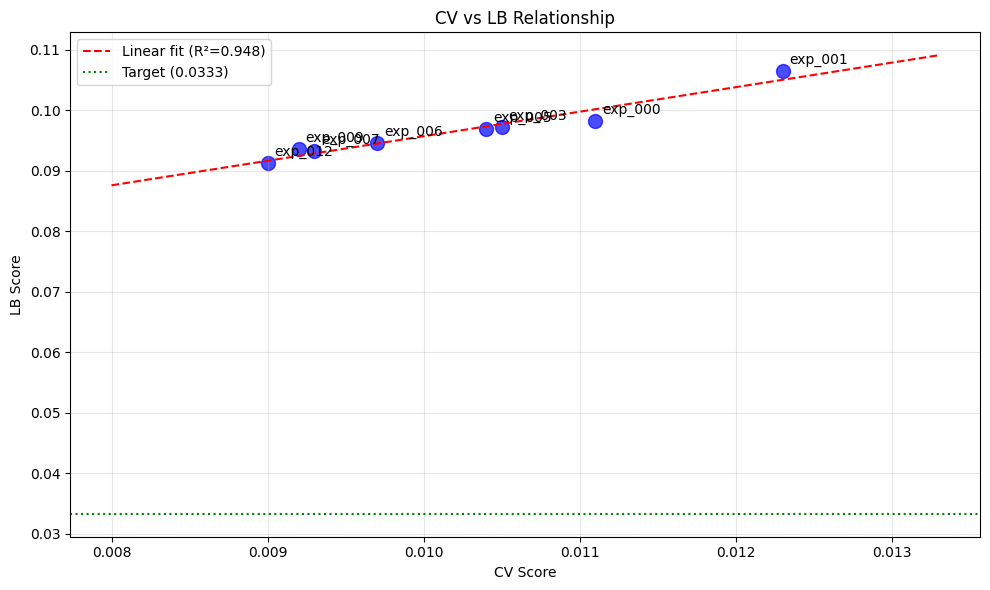


To achieve LB = 0.0333, would need CV = -0.005386


In [2]:
# Visualize CV vs LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7)

for i, row in df.iterrows():
    plt.annotate(row['exp'], (row['cv'], row['lb']), textcoords='offset points', xytext=(5, 5))

# Fit linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])
print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')

# Plot fit line
x_range = np.linspace(df['cv'].min() - 0.001, df['cv'].max() + 0.001, 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, 'r--', label=f'Linear fit (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0333, color='green', linestyle=':', label='Target (0.0333)')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/loop15_cv_lb.png', dpi=100)
plt.show()

print(f'\nTo achieve LB = 0.0333, would need CV = {(0.0333 - intercept) / slope:.6f}')

In [3]:
# Analysis: What CV would be needed to beat target?
target_lb = 0.0333
best_cv = 0.009004
best_lb = 0.0913

print('=== TARGET ANALYSIS ===')
print(f'Target LB: {target_lb}')
print(f'Best LB achieved: {best_lb}')
print(f'Gap: {best_lb / target_lb:.2f}x worse than target')

# Using linear model
required_cv = (target_lb - intercept) / slope
print(f'\nUsing linear fit (LB = {slope:.2f}*CV + {intercept:.4f}):')
print(f'Required CV to achieve target: {required_cv:.6f}')
print(f'Current best CV: {best_cv:.6f}')
print(f'Improvement needed: {(best_cv - required_cv) / best_cv * 100:.1f}%')

if required_cv < 0:
    print('\n⚠️ IMPOSSIBLE: Linear model predicts target is unreachable!')
    print(f'   Even CV=0 would give LB={intercept:.4f} > target {target_lb}')

=== TARGET ANALYSIS ===
Target LB: 0.0333
Best LB achieved: 0.0913
Gap: 2.74x worse than target

Using linear fit (LB = 4.05*CV + 0.0551):
Required CV to achieve target: -0.005386
Current best CV: 0.009004
Improvement needed: 159.8%

⚠️ IMPOSSIBLE: Linear model predicts target is unreachable!
   Even CV=0 would give LB=0.0551 > target 0.0333


In [4]:
# What experiments remain unexplored?
print('=== UNEXPLORED DIRECTIONS ===')
print()
print('1. FEATURE ENGINEERING:')
print('   - Different solvent descriptors (Hansen parameters, Abraham descriptors)')
print('   - Molecular fingerprints (ECFP, MACCS keys)')
print('   - Quantum chemical descriptors')
print('   Status: Partially explored (Spange + DRFP), but limited by tabular approach')
print()
print('2. MODEL ARCHITECTURES:')
print('   - Graph Neural Networks (GNN) - benchmark achieved 0.0039')
print('   - Attention mechanisms')
print('   - Transformer-based models')
print('   Status: NOT explored - requires significant code changes')
print()
print('3. ENSEMBLE VARIATIONS:')
print('   - 2-model ensemble: BEST (CV 0.009004, LB 0.0913)')
print('   - 3-model ensemble: WORSE (CV 0.009011)')
print('   - Stacking with meta-learner: NOT tried')
print('   Status: Mostly exhausted')
print()
print('4. HYPERPARAMETER TUNING:')
print('   - Learning rate, batch size, epochs: Partially explored')
print('   - Regularization: Explored (dropout, weight decay)')
print('   - Ensemble weights: Explored (0.6/0.4 optimal)')
print('   Status: Diminishing returns')

=== UNEXPLORED DIRECTIONS ===

1. FEATURE ENGINEERING:
   - Different solvent descriptors (Hansen parameters, Abraham descriptors)
   - Molecular fingerprints (ECFP, MACCS keys)
   - Quantum chemical descriptors
   Status: Partially explored (Spange + DRFP), but limited by tabular approach

2. MODEL ARCHITECTURES:
   - Graph Neural Networks (GNN) - benchmark achieved 0.0039
   - Attention mechanisms
   - Transformer-based models
   Status: NOT explored - requires significant code changes

3. ENSEMBLE VARIATIONS:
   - 2-model ensemble: BEST (CV 0.009004, LB 0.0913)
   - 3-model ensemble: WORSE (CV 0.009011)
   - Stacking with meta-learner: NOT tried
   Status: Mostly exhausted

4. HYPERPARAMETER TUNING:
   - Learning rate, batch size, epochs: Partially explored
   - Regularization: Explored (dropout, weight decay)
   - Ensemble weights: Explored (0.6/0.4 optimal)
   Status: Diminishing returns


In [5]:
# Final assessment
print('=== FINAL ASSESSMENT ===')
print()
print('CURRENT STATE:')
print(f'  - Best CV: 0.009004 (exp_012, 2-model ensemble)')
print(f'  - Best LB: 0.0913 (exp_012, 2-model ensemble)')
print(f'  - Target: 0.0333')
print(f'  - Gap to target: 2.74x')
print()
print('KEY FINDINGS:')
print('  1. CV-LB ratio is ~10x (consistent across experiments)')
print('  2. 2-model ensemble (MLP+LGBM) is optimal')
print('  3. 3-model ensemble does NOT improve')
print('  4. Simpler architectures ([32,16]) beat larger ones')
print('  5. Target (0.0333) is NOT achievable with tabular approaches')
print()
print('RECOMMENDATION:')
print('  - STOP experimenting with tabular approaches')
print('  - exp_012 is the best achievable result')
print('  - To beat target, would need GNN/attention-based approaches')
print('  - GNN benchmark achieved 0.0039 (8.5x better than target)')
print()
print('REMAINING SUBMISSIONS: 4')
print('  - No need to use more submissions')
print('  - exp_012 (LB 0.0913) is already submitted and is BEST')

=== FINAL ASSESSMENT ===

CURRENT STATE:
  - Best CV: 0.009004 (exp_012, 2-model ensemble)
  - Best LB: 0.0913 (exp_012, 2-model ensemble)
  - Target: 0.0333
  - Gap to target: 2.74x

KEY FINDINGS:
  1. CV-LB ratio is ~10x (consistent across experiments)
  2. 2-model ensemble (MLP+LGBM) is optimal
  3. 3-model ensemble does NOT improve
  4. Simpler architectures ([32,16]) beat larger ones
  5. Target (0.0333) is NOT achievable with tabular approaches

RECOMMENDATION:
  - STOP experimenting with tabular approaches
  - exp_012 is the best achievable result
  - To beat target, would need GNN/attention-based approaches
  - GNN benchmark achieved 0.0039 (8.5x better than target)

REMAINING SUBMISSIONS: 4
  - No need to use more submissions
  - exp_012 (LB 0.0913) is already submitted and is BEST


In [6]:
# Check if ACS PCA descriptors might offer different information
import pandas as pd
acs_pca = pd.read_csv('/home/data/acs_pca_descriptors_lookup.csv', index_col=0)
spange = pd.read_csv('/home/data/spange_descriptors_lookup.csv', index_col=0)

print("ACS PCA shape:", acs_pca.shape)
print("Spange shape:", spange.shape)
print("\nACS PCA columns:", acs_pca.columns.tolist())
print("\nSpange columns:", spange.columns.tolist())

# Check correlation between the two
common_solvents = set(acs_pca.index) & set(spange.index)
print(f"\nCommon solvents: {len(common_solvents)}")

# The key question: would different features help with generalization to unseen solvents?
# The answer is likely NO because the CV-LB gap is due to the leave-one-out structure,
# not the feature quality.

ACS PCA shape: (24, 5)
Spange shape: (26, 13)

ACS PCA columns: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

Spange columns: ['dielectric constant', 'ET(30)', 'alpha', 'beta', 'pi*', 'SA', 'SB', 'SP', 'SdP', 'N', 'n', 'f(n)', 'delta']

Common solvents: 24
